<h1 align=center>21127347_Project02</h1>

*Đặng Hoàng Long, 21127347, 21CLC09*

**Table of contents**<a id='toc0_'></a>  

- [1. Loading the necessary libraries](#toc1_)  
  
- [2. Defining the functions](#toc2_)  
  
  - [2.1. Loading the image](#toc2_1_)  
  
  - [2.2. Change image brightness](#toc2_2_)  
       
  - [2.3. Change image contrast](#toc2_3_)  
      
  - [2.4. Flip image (vertical, horizontal)](#toc2_4_)      
  
  - [2.5. Convert to grayscale/sepia](#toc2_5_)      
  
  - [2.6. Blur/sharpen an image](#toc2_6_)      
  
    - [2.6.1. Blurring:](#toc2_6_1_)      
  
    - [2.6.2. Other blurring techniques that I have found but have yet to implement in this project:](#toc2_6_2_)      
  
      - [Gaussian blur](#toc2_6_2_1_)     
   
      - [Box Blur (Mean Blur):](#toc2_6_2_2_) 
      
      - [Median Blur:](#toc2_6_2_3_)      
  
    - [2.6.3. Sharpening:](#toc2_6_3_)  
  
  - [2.7 Crop square image from center](#crop)
       
  - [2.8. Circle crop image](#toc2_7_)      
  
  - [2.9. Bonus: Bi-elliptic crop](#toc2_8_)  
          
- [3. Main function](#toc4_) 
      
- [4. References and useful links](#toc5_)      

**Completed functions:**
- Change image brightness
  
- Change image contrast
  
- Flip image (horizontally/vertically/both)
  
- Convert image to grayscale and sepia tone
  
- Blur/sharpen image
  
- Crop square image from center
  
- Circular crop image
  
- Elliptical crop image
  

# <a id='toc1_'></a>[ Loading the necessary libraries](#toc0_)


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import PIL.Image as Image

____

# <a id='toc2_'></a>[ Defining the functions](#toc0_)

## <a id='toc2_1_'></a>[Loading the image](#toc0_)

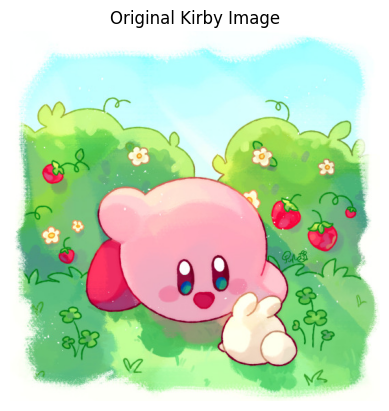

In [38]:
def load_image(path: str) -> np.ndarray:
    """Load image from path and convert to numpy array.

    Args:
        - path (str): path to image file

    Returns:
        - img (np.ndarray): image as numpy array
    """
    img = Image.open(path)
    
    # Convert to RGB from other modes
    if img.mode != 'RGB':
        img = img.convert('RGB')

    # Convert to numpy array
    img = np.asarray(img)

    return img


try: 
    img = load_image('another_kirby.png')

    plt.title('Original Kirby Image')
    plt.axis('off')
    plt.imshow(img)
    plt.show()

except FileNotFoundError:
    pass


Since the testing process is pretty tedious, I've decided to write a function to display the original image along with the image after applying the function used.

In [12]:
def subplot_img(img: np.ndarray, new_img: np.ndarray, func_name: str):
    """Display original image along with the image after applying the function func_name.

    Args:
        - img (np.ndarray): Input image array.
        - new_img (np.ndarray): Image array after applying the function func_name.
        - func_name (str): The name of the function to be applied on the image.

    Returns:
        - None
    """
    plt.figure(figsize=(10, 10))
    
    plt.subplot(121)
    plt.imshow(img, cmap="gray")
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(122)
    plt.imshow(new_img, cmap="gray")
    plt.title(func_name)
    plt.axis("off")
    plt.show()

## <a id='toc2_2_'></a>[Change image brightness](#toc0_)

Changing the brightness of an image is a relatively simple operation and usually involves adding a constant value to all the color channels of all pixels in the image.
```python
I_brightness_adjusted = I + beta
```

where ``beta`` is how much you want to increase or decrease the brightness. If ``beta`` is a positive number, the image will be brighter. If ``beta`` is negative, the image will be darker.

Note: After this operation some of the pixel values might become more than the highest possible value or less than the lowest possible value (usually 255 and 0 for 8-bit images). In such cases, the usual action is to perform a cut-off, setting all overflows to the maximum value and all underflows to the minimum.

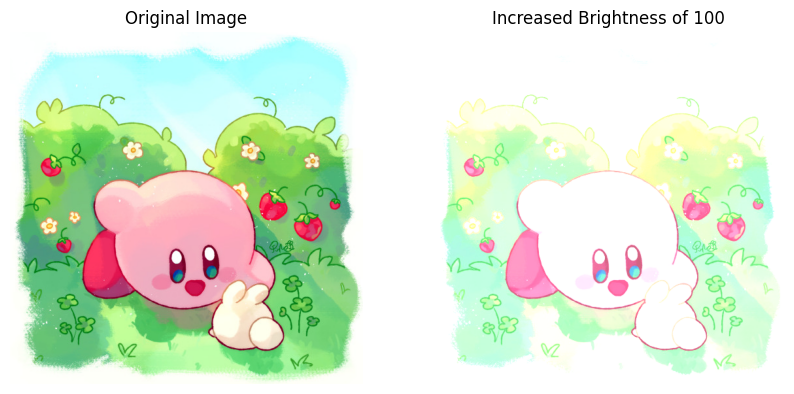

In [39]:
# Change image brightness
def change_brightness(img: np.ndarray, brightness_factor: int) -> np.ndarray:
    """Change the brightness of an image using the brightness factor.

    Brightness can be changed by multiplying a constant factor to the pixel array.
    
    Args: 
        - img (np.ndarray): Input image array.
        - brightness_factor (int): Factor to multiply the image by.

    Returns:
        - new_img (np.ndarray): Image object with the modified brightness.

    Raises:
        TypeError: If brightness_factor is not a float.
        TypeError: If image is not a numpy array.
    """
    # Check that the image is a numpy array
    if not isinstance(img, np.ndarray):
        raise TypeError("Image must be a numpy array")

    # Ensure data type to prevent overflow errors
    new_img = img.astype('int16')
    new_img = new_img + brightness_factor
    new_img = np.clip(new_img, 0, 255)

    # Return the image
    return new_img

try:
    subplot_img(img, change_brightness(img, 100), 'Increased Brightness of 100')

except NameError:
    pass


## <a id='toc2_3_'></a>[Change image contrast](#toc0_)

Changing the contrast of an image involves scaling the difference of an image's color values and a "**pivot**" value, often chosen to be the middle of the color scale (e.g., 128 out of 255):
 ```python
 I_contrast_adjusted = (I - pivot) * gamma + pivot
 ```

Here gamma is the contrast adjustment factor. If ``gamma > 1``, contrast is increased; if ``0 < gamma < 1``, contrast is decreased; If ``gamma = 1``, the image will remain unchanged.

Increasing the contrast of an image will make the darks darker and the brights brighter, while decreasing the contrast will make the image more uniform in color and brightness.

In [15]:
def change_contrast(img: np.ndarray, contrast_level: float) -> np.ndarray:
    """Change the contrast of an image by the given level.

    The contrast can be adjusted by subtracting the mean pixel value from all pixels, 
    multiplying by the contrast factor, and then adding the mean pixel value back.

    Args:
        - img (np.ndarray): Input image array.
        - contrast_level (float): The contrast level.

    Returns:
        - new_img (np.ndarray): The processed image.
    
    Raises:
        TypeError: If the image is not a numpy array.
    """
    # Check that the image is a numpy array
    if not isinstance(img, np.ndarray):
        raise TypeError("Image must be a numpy array")

    # Convert array to float32 for better accuracy.
    new_img = img.astype('float32')
    img = img.astype('float32')

    # Calculate the mean of the image.
    img_mean = np.mean(img)

    # Subtract the mean from the image.
    new_img -= img_mean

    # Scale the image by the contrast level.
    new_img *= contrast_level

    # Add the mean back to the image.
    new_img += img_mean

    # Clip the image to the range of [0, 255] and convert to uint8.
    new_img = np.clip(new_img, 0, 255).astype('uint8')

    return new_img

try:
    subplot_img(img, change_contrast(img, 50), 'Contrast Adjusted Image (raised by 50)')   
except NameError:
    pass



## <a id='toc2_4_'></a>[Flip image (vertical, horizontal)](#toc0_)

In [18]:
def flip_image(img: np.ndarray, flip_direction: str) -> np.ndarray:
    """Flips the image horizontally or vertically.

    The flip could be done with np.flip function.

    Args:
        - img (np.ndarray): Input image array.
        - flip_direction (str): The direction of the flip, either 'h' or 'v' or 'hv'.

    Returns:
        - new_img (np.ndarray): The flipped image.

    Raises:
        ValueError: If flip_direction is not 'h' or 'v'.
        TypeError: If img is not a numpy array.
    """
    # Check that the image is a numpy array
    if not isinstance(img, np.ndarray):
        raise TypeError("Image must be a numpy array")
    
    if flip_direction == 'h':
        new_img = np.flip(img, axis=1)
    elif flip_direction == 'v':
        new_img = np.flip(img, axis=0)
    elif flip_direction == 'hv':   
        new_img = np.flip(img, axis=1)
        new_img = np.flip(new_img, axis=0) 
    else:
        raise ValueError('flip_direction should be either h or v')
    
    return new_img

try:
    subplot_img(img, flip_image(img, 'hv'), 'Flipped image (hv)')
except NameError:
    pass

## <a id='toc2_5_'></a>[Convert to grayscale/sepia](#toc0_)

The grayscale image transformation is based on human perception of colors. We're more sensitive to green, less to red and even less to blue. The *coefficients* (or *weights*) ``[0.2989, 0.587, 0.114]`` in the grayscale scale function represent the measured intensity perception of typical humans to red, green and blue respectively.

`grayscale = 0.2989*red + 0.5870*green + 0.1140*blue`

By using these weights on the RGB components of each pixel in the image, we effectively convert the image into grayscale. The operations are scalar multiplication and summation.

In [20]:
def grayscale_image(img: np.ndarray) -> np.ndarray:
    """Converts an image to grayscale.

    To convert an image to grayscale, we can use numpy's dot product (numpy.dot) operation
    to multiply the image array by a conversion matrix. 

    Args:
        - img (np.ndarray): Input image array.

    Returns:
        - new_img (np.ndarray): The converted image.
    
    Raises:
        ValueError: If the image is not a 3D array.
        TypeError: If img is not an np.ndarray.
    """
    # Check that the image is a numpy array
    if not isinstance(img, np.ndarray):
        raise TypeError("Image must be a numpy array")

    # Convert the image to grayscale. 
    # The conversion formula is a common standard for transforming color to grayscale.
    new_img = np.dot(img[...,:3], [0.2989, 0.5870, 0.1140])

    print(new_img.shape)

    return new_img

try:
    subplot_img(img, grayscale_image(img), "Grayscale Image")
except NameError:
    pass

In [21]:
def sepia_image(img: np.ndarray) -> np.ndarray:
    """Converts an RGB image to sepia.

    We'll use a common formula to obtain gray value from RGB values
    and apply a sepia filter using matrix multiplication with sepia matrix

    Args:
        - img (np.ndarray): Input image array.

    Returns:
        - new_img (np.ndarray): Sepia image.

    Raises:
        TypeError: if img is not a np.ndarray.
    """
    # Check that the image is a numpy array
    if not isinstance(img, np.ndarray):
        raise TypeError("Image must be a numpy array")
    
    new_img = img.astype('float32')

    # Apply sepia filter (assuming input image is RGB)
    sepia_filter = np.array([[.393, .769, .189],
                            [.349, .686, .168],
                            [.272, .534, .131]])
    
    new_img = new_img @ sepia_filter.T # Matrix multiplication
    new_img = np.clip(new_img, 0, 255).astype('uint8')

    return new_img

try:
    subplot_img(img, sepia_image(img), 'Sepia Image')
except NameError:
    pass

##  <a id='toc2_6_'></a>[Blur/sharpen an image](#toc0_)

###  <a id='toc2_6_1_'></a>[Blurring:](#toc0_)

The code below uses **Downsampling and upsampling**.
    
Blurring an image by downsampling and upsampling works by first reducing the image's resolution by averaging together neighboring pixels. This effectively blurs the image, as the edges and fine details are smoothed out. The image is then upsampled to its original resolution, using a technique such as bilinear interpolation. This process of downsampling and upsampling can be repeated multiple times to achieve a desired level of blur.

In [22]:
def blur_image(img: np.ndarray, downsample_factor: float) -> np.ndarray:
    """Blurs an image by downsampling and upsampling.

    Args:
        - img (np.ndarray): Input image array.
        - downsample_factor (float): The factor by which to downsample the image.

    Returns:
        - upsampled_array (np.ndarray): The blurred image.

    Raises:
        TypeError: If the image is not a numpy array.
    """
    # Check that the image is a numpy array
    if not isinstance(img, np.ndarray):
        raise TypeError("Image must be a numpy array")
    
    # Downsample by taking every downsample_factor-th pixel
    downsampled_array = img[::downsample_factor, ::downsample_factor, :]

    # Upsample by repeating pixels downsample_factor times
    upsampled_array = np.repeat(np.repeat(downsampled_array, downsample_factor, axis=0), downsample_factor, axis=1)

    # Make sure the upsampled image is not larger than original (if original dimensions are not divisible by downsample_factor)
    upsampled_array = upsampled_array[:img.shape[0], :img.shape[1], :]

    return upsampled_array

try:
    subplot_img(img, blur_image(img, 10), "Blurred Image, downsample factor = 10")
except NameError:
    pass

###  <a id='toc2_6_2_'></a>[Other blurring techniques that I have found but have yet to implement in this project:](#toc0_)

####  <a id='toc2_6_2_1_'></a>[Gaussian blur](#toc0_)
The Gaussian blur is a type of image-blurring filter that uses a Gaussian function. This is a circular (or radial) symmetric operation where the value of each output pixel is calculated as the weighted sum of its neighboring input pixels. The weights decrease with distance from the center of the filter, following a Normal Distribution, which is where the name comes from.

The mathematical formula for a Gaussian function in two dimensions is:

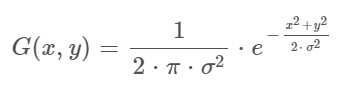

where:

- `x` and `y` are the distances from the origin in the horizontal and vertical directions, respectively,
- `sigma` is the standard deviation of the Gaussian distribution. In the case of the blur effect, it determines the amount of blurring: the bigger the `sigma`, the bigger the neighborhood around a given pixel that contributes to its final value, hence the image is more blurred.

When we apply the filter to the image, for each pixel, we construct a neighborhood around the current pixel (depending on the radius of the kernel), and calculate the sum of the values of the neighboring pixels, each given a weight according to the Gaussian function. The output pixel is set to this sum. Note that the weights, due to the properties of the Gaussian function, will more heavily favor values closer to the center of the kernel, giving the blur effect.

In the `ImageFilter.GaussianBlur` function, the `radius` parameter approximates the standard deviation, `sigma`, in the Gaussian function.

In both transformations - grayscale and blur - we are applying a function to each pixel of the image. These types of transformations where the output pixel's value depends on only the corresponding input pixel (or a neighborhood of it) and is the same for all pixels in the image are called point operations.


####  <a id='toc2_6_2_2_'></a>[Box Blur (Mean Blur):](#toc0_)
In the Box Blur, we define a neighborhood around each pixel and calculate the average color value of all the pixels in that neighborhood. This average color value then replaces the original value of the pixel. It's called a box blur because this neighborhood is usually a rectangular (or square) region; that is, a box.

The size of the box (usually defined by its radius) is what determines the "blurriness". A larger box size results in each pixel being replaced with the average of more pixels, thereby more closely blending the colors together, and resulting in a blurrier image.

Mathematically speaking, the operation at each pixel (i, j) in image I would look something like this:


```python
I_blurred[i][j] = sum(I[k][l] for each (k, l) in Neighborhood(i, j))/count(Neighborhood(i, j))
```


Here, "Neighborhood(i, j)" refers to the set of pixel coordinates that fall inside the box centered at (i, j), "I\[k]\[l]" is the color value of the pixel at (k, l), and "count(...)" is counting the number of pixels in the neighborhood. So, you are summing up the color values of all pixels in the neighborhood and dividing by the number of those pixels - in other words, taking an average.

####  <a id='toc2_6_2_3_'></a>[Median Blur:](#toc0_)
A Median Blur is similar to a Box Blur but with a key difference: instead of replacing each pixel with the average color value of its neighborhood, we replace it with the median value.

The median is calculated by first sorting all the color values, and then selecting the middle one. If there is even number of numbers, the median is the average of the two middle numbers.

Mathematically, the operation at pixel (i, j) in image I is:
```python
I_blurred[i][j] = median(I[k][l] for each (k, l) in Neighborhood(i, j))
```

Again, "Neighborhood(i, j)" refers to the set of pixel coordinates that fall inside the box centered at (i, j), and "I[k][l]" is the color value of the pixel at (k, l). This time, though, "median(...)" is calculating the median of those color values. The set of color values from the neighborhood pixels are sorted, and the middle value (or the average of the two middle values if the number of them is even) is selected and used as the new color value for the pixel (i, j).

The Median Blur has a very useful property of preserving edges while removing noise, therefore it is widely used in digital image processing for noise reduction.

In both Box Blur and Median Blur, the box size (or the radius of the neighborhood) is a parameter that you can adjust. The larger the box size, the more pixels are averaged together or the more values there are to find the median from, resulting in smoother but less sharp image.

###  <a id='toc2_6_3_'></a>[Sharpening:](#toc0_)
The concept behind sharpening is to add a scaled version of the "high-frequency" details of an image back to itself in order to make these details more pronounced. Mathematically, the sharpening process can be expressed as follows: 
```python
I_sharpened = I + alpha*(I - I_blurred)
```

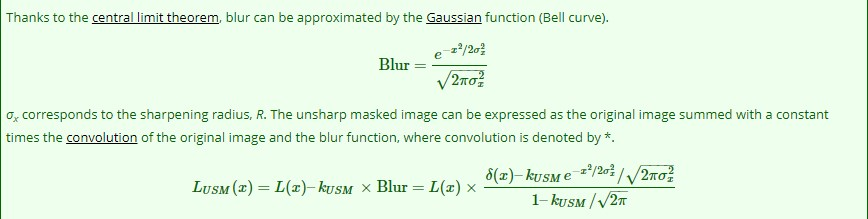

Here, `I_blur` is a blurred version of the original image I and is used as an approximation of the "low-frequency" components of the image. The difference (``I - I_blur``) hence represents high-frequency components (fast color changes in the image, such as edges), and ``alpha`` is a scaling factor controlling how much of the high-frequency details to add back to the original image.

In this equation, the blurred version of the image is usually obtained using a *Gaussian filter*, the same as in the blurring operation above.

To perform 2D convolution with numpy only, I would have to implement the convolution operation manually. A 2D convolution involves sliding the kernel over the image (or equivalently, flipping the kernel both horizontally and vertically, and then sliding over the image and summing the elementwise multiplications).

Another formula for this method is shown on GeekforGeeks. The formula is as follows:
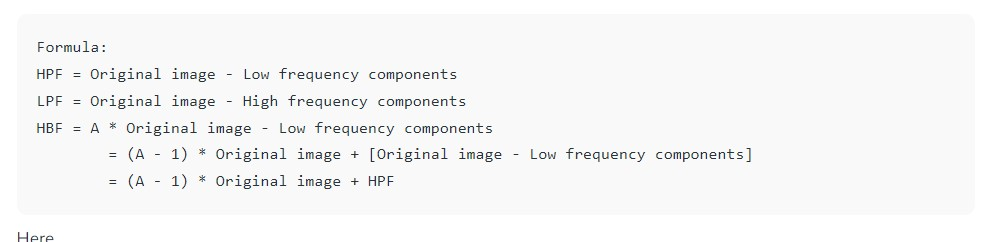

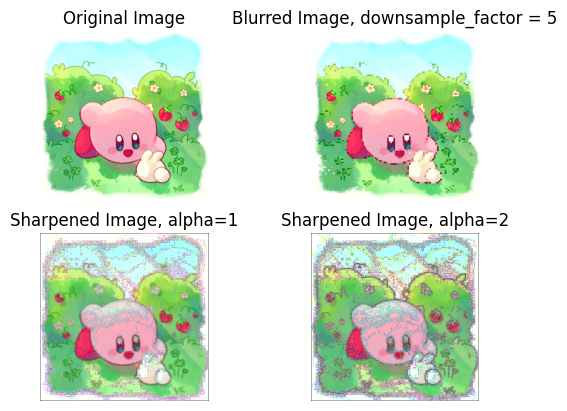

In [28]:
def pad(img, s):
    return np.pad(img, ((s, s), (s, s)), 'constant')

def conv_2d(img, kernel):
    k_size = kernel.shape[0]
    result = np.zeros_like(img)
    img = pad(img, k_size//2)
    for x in range(result.shape[1]):
        for y in range(result.shape[0]):
            result[y, x]=(kernel*img[y:y+k_size, x:x+k_size]).sum()
    return result


def sharpen_image(img: np.ndarray, alpha: float) -> np.ndarray:
    """Sharpen an image using box filter (with np.ones and np.convolve).

    Compute blurred image using box filter (with np.ones and np.convolve)
    and then compute a "detail" array as the difference between original and blurred image  
    
    The sharpened image is then compute as the original image plus alpha times the detail.

    Args:
        - img (np.ndarray): Input image array.
        - alpha (float): sharpening factor.

    Returns:
        - sharpened_img (np.ndarray): sharpened image array.

    Raises:
        TypeError: if input is not a np.ndarray.
    """
    # Check that the image is a numpy array
    if not isinstance(img, np.ndarray):
        raise TypeError("Image must be a numpy array")

    # kernel = np.ones((3,3),np.float32)/9
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

    blurred = np.zeros_like(img)
    for c in range(img.shape[2]):
        blurred[:,:,c] = conv_2d(img[:,:,c], kernel)

    # Compute "details"
    details = img - blurred

    # Compute sharpened image array as original + alpha*details
    sharpened_img = img + alpha * details

    # Clip values to stay in valid range
    sharpened_img = np.clip(sharpened_img, 0, 255)

    return sharpened_img.astype('uint8')


try:
    img = load_image('another_kirby.png')

    plt.subplot(2, 2, 1)
    plt.title('Original Image')
    plt.axis('off')
    plt.imshow(img)

    plt.subplot(2, 2, 2)
    blurred = blur_image(img, 5)
    plt.imshow(blurred)
    plt.title('Blurred Image, downsample_factor = 5')
    plt.axis('off')

    # Sharpen image from blurred image
    for i in range(1, 3):
        plt.subplot(2, 2, i+2)
        plt.imshow(sharpen_image(img, i))
        plt.title('Sharpened Image, alpha={}'.format(i))
        plt.axis('off')
except FileNotFoundError:
    pass

## <a id="crop"></a>[Crop square image from the center](#toc0_)

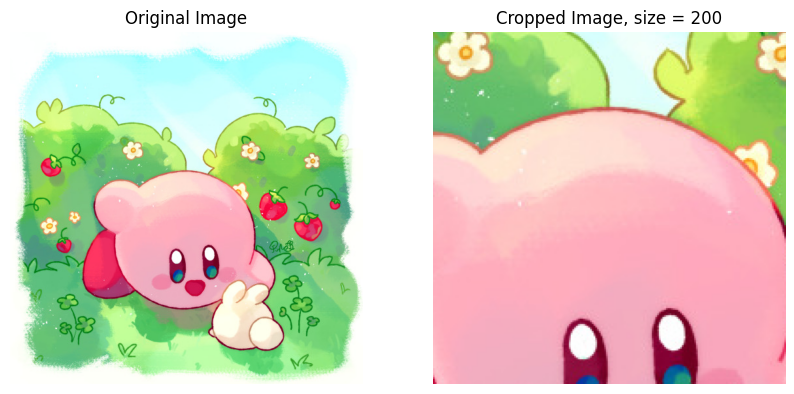

In [30]:
def square_crop_image(img: np.ndarray, crop_size: float) -> np.ndarray:
    """Crop an image from the center to the specified size.

    Args:
        - img (np.ndarray): Input image array
        - crop_size (float): Size of the cropped image

    Returns:
        - new_img (np.ndarray): Cropped image array

    Raises:
        ValueError: If the crop size is larger than the image size
        TypeError: If the input image is not a numpy array
    """
    if not isinstance(img, np.ndarray):
        raise TypeError("Input image must be a numpy array")

    if crop_size > img.shape[0] or crop_size > img.shape[1]:
        raise ValueError("Crop size must be smaller than the image size")

    # Get the center of the image
    center_x = int(img.shape[0] / 2)
    center_y = int(img.shape[1] / 2)

    # Get the start and end of the crop
    start_x = center_x - int(crop_size / 2)
    end_x = center_x + int(crop_size / 2)
    start_y = center_y - int(crop_size / 2)
    end_y = center_y + int(crop_size / 2)

    # Crop the image
    new_img = img[start_x:end_x, start_y:end_y]

    return new_img

try:
    subplot_img(img, square_crop_image(img, 200), "Cropped Image, size = 200")
except NameError:
    pass

##  <a id='toc2_7_'></a>[Circle crop image](#toc0_)

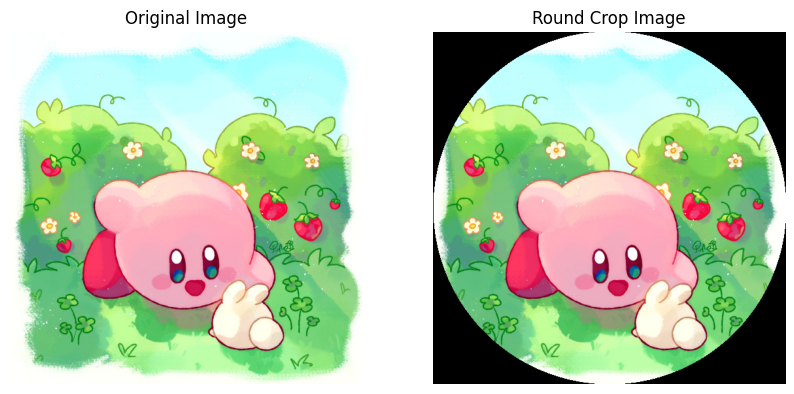

In [29]:
def round_crop_image(img: np.ndarray) -> np.ndarray:
    """Cropping an image so that it has round edges.

    Generate a circular mask and apply it to our image. 
    For this, we can use the equation of a circle and broadcasting in numpy.

    Args:
        - img (np.ndarray): Input image arrray.
    
    Returns:
        - round_img (np.ndarray): Round image array.

    Raises:
        TypeError: If the input is not a numpy array.
    """
    # Check that the image is a numpy array
    if not isinstance(img, np.ndarray):
        raise TypeError("Image must be a numpy array")
    
    # Compute a grid of distances from center of image
    h, w = img.shape[:2]
    center = (w / 2, h / 2)
    x, y = np.meshgrid(np.arange(w), np.arange(h)) 
    d = ((x - center[0])**2 + (y - center[1])**2)**0.5  # distance from center

    # Generate mask based on distance
    r = min(w, h) / 2  # radius
    mask = d < r

    # Apply mask (by multiplication it will set non-masked values to 0)
    round_img = img * mask[..., np.newaxis]

    return round_img

try:
    subplot_img(img, round_crop_image(img), "Round Crop Image")
except NameError:
    pass

##  <a id='toc2_8_'></a>[Bonus: Bi-elliptic crop](#toc0_)

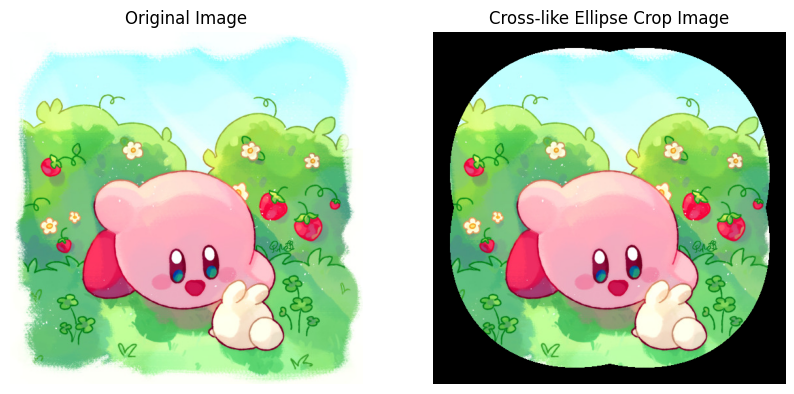

In [32]:
def crop_cross_ellipse(img: np.ndarray) -> np.ndarray:
    """Cropping an image so it has a cross-like shape.

    This will generate two ellipses, one rotated 45 degrees counter-clockwise, and one 45 degrees clockwise.

    Args:
        - img (np.ndarray): Input image array.

    Returns:
        - img (np.ndarray): Cropped image array.

    Raises:
        TypeError: If the input image is not a numpy array.
    """
    # Check that the image is a numpy array
    if not isinstance(img, np.ndarray):
        raise TypeError("Image must be a numpy array")
    
    # Generate coordinate grid
    yidx, xidx = np.indices(img.shape[:2])

    # Center coordinates
    cy = img.shape[0] // 2
    cx = img.shape[1] // 2

    # Generate two rotated ellipse masks
    theta1 = np.pi / 4  # 45 degrees rotation
    theta2 = -np.pi / 4  # -45 degrees rotation
    a = img.shape[1] / 2
    b = img.shape[1] * 0.8 / 2
    mask1 = (((xidx-cx)*np.cos(theta1) + (yidx-cy)*np.sin(theta1)) / a) ** 2 + (((xidx-cx)*np.sin(theta1) - (yidx-cy)*np.cos(theta1)) / b) ** 2 <= 1
    mask2 = (((xidx-cx)*np.cos(theta2) + (yidx-cy)*np.sin(theta2)) / a) ** 2 + (((xidx-cx)*np.sin(theta2) - (yidx-cy)*np.cos(theta2)) / b) ** 2 <= 1

    # Intersect masks (get cross)
    mask = mask1 | mask2

    mask = mask.astype(np.uint8)

    new_img = np.copy(img)

    # Apply mask to each channel of the image 
    for c in range(img.shape[2]):
        new_img[:,:,c] *= mask

    return new_img.astype(np.uint8)

try:
    subplot_img(img, crop_cross_ellipse(img), "Cross-like Ellipse Crop Image")
except NameError:
    pass

____

#  <a id='toc4_'></a>[Main function](#toc0_)

Image name: another_kirby
1. Change image brightness
2. Change image contrast
3. Flip image (horizontally/vertically/both)
4. Grayscale and sepia tone image
5. Blur and sharpen image
6. Crop square image from center
7. Crop round image
Elliptical crop
All of the above
Choice: 0
Save: y
You chose to apply all of the above.


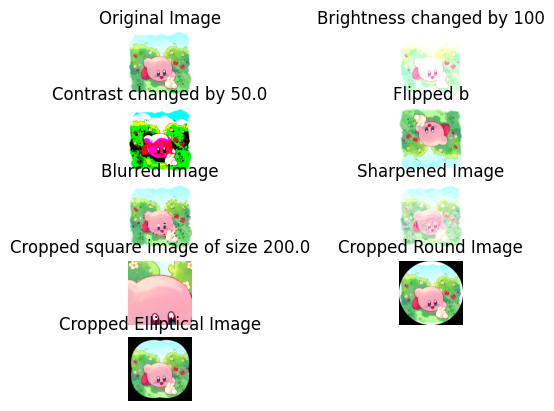

In [47]:
def save_image(img: np.ndarray, img_name: str, func_name: str) -> None:
    """Saves image with the given name and function name.
    
    Args:
        - img (np.ndarray): Image to save
        - img_name (str): Name of the image
        - func_name (str): Name of the function

    Returns:
        - None
    """
    img = img.astype(np.uint8) # Convert to uint8 to save image

    image = Image.fromarray(img)

    image.save(img_name + "_" + func_name + ".png", "PNG")




def main():
    # User input
    path = str(input("Enter image path: "))

    if path == "":
        return
    
    img_name = path.split(".")[0] # Get image name from the path

    # Load image
    img = load_image(path)
    
    choices = {
        1: "1. Change image brightness",
        2: "2. Change image contrast",
        3: "3. Flip image (horizontally/vertically/both)",
        4: "4. Grayscale and sepia tone image",
        5: "5. Blur and sharpen image",
        6: "6. Crop square image from center",
        7: "7. Crop round image",
        8: "Elliptical crop",
        0: "All of the above"
    }

    print("Image name: " + img_name)

    # Display choices
    for choice in choices.values():
        print(choice)

    # User input
    choice = int(input("Enter choice: "))
    print("Choice: " + str(choice))
    
    if choice == None:
        return # Exit if no choice is made

    save = str(input("Save image? (y/n): "))
    print("Save: " + save)
    
    if save == None:
        save = "n" # Default to no if no input is given

    # Image processing
    if choice == 1:
        print("You chose to change the image brightness.")

        brightness_factor = int(input("Enter brightness factor (int): "))
        new_img = change_brightness(img, brightness_factor)

        if save == "y":
            save_image(new_img, img_name, "brightness")

        subplot_img(img, new_img, f"Brightness changed by {brightness_factor}")

    elif choice == 2:
        print("You chose to change the image contrast.")

        contrast_level = float(input("Enter contrast factor (float): "))
        new_img = change_contrast(img, contrast_level)

        if save == "y":
            save_image(new_img, img_name, "contrast")

        subplot_img(img, new_img, f"Contrast changed by {contrast_level}")

    elif choice == 3:
        print("You chose to flip the image.")

        flip = str(input("Flip horizontally, vertically, or both? (h/v/b): "))
        print("Flip: " + flip)

        if flip == "h":
            new_img = flip_image(img, "horizontal")
        elif flip == "v":
            new_img = flip_image(img, "vertical")
        elif flip == "b":
            new_img = flip_image(img, "hv")

        if save == "y":
            save_image(new_img, img_name, "flip")

        subplot_img(img, new_img, f"Flipped {flip}")

    elif choice == 4:
        print("You chose to grayscale and sepia tone the image.")

        grayscale_img = grayscale_image(img)
        sepia_img = sepia_image(img)
        
        if save == "y":
            save_image(grayscale_img, img_name, "grayscale")
            save_image(sepia_img, img_name, "sepia")

        plt.subplot(1, 3, 1)
        plt.imshow(img)
        plt.title("Original Image")
        plt.axis("off")

        plt.subplot(1, 3, 2)
        plt.imshow(grayscale_img)
        plt.title("Grayscale Image")
        plt.axis("off")

        plt.subplot(1, 3, 3)
        plt.imshow(sepia_img)
        plt.title("Sepia Image")
        plt.axis("off")

        plt.show()

    elif choice == 5:
        print("You chose to blur and sharpen the image.")

        downsample_factor = int(input("Enter downsample factor (float): "))
        alpha = float(input("Enter alpha (float): "))

        blur_img = blur_image(img, downsample_factor)
        sharpen_img = sharpen_image(blur_image, alpha)
        
        if save == "y":
            save_image(blur_img, img_name, "blur")
            save_image(sharpen_img, img_name, "sharpen")

        plt.subplot(1, 3, 1)
        plt.imshow(img)
        plt.title("Original Image")
        plt.axis("off")

        plt.subplot(1, 3, 2)
        plt.imshow(blur_img)
        plt.title("Blurred Image")
        plt.axis("off")

        plt.subplot(1, 3, 3)
        plt.imshow(sharpen_img)
        plt.title("Sharpened Image From Blurred Image")
        plt.axis("off")

        plt.show()

    elif choice == 6:
        print("You chose to crop a square image from the center.")

        size = float(input("Enter size (float): "))
        new_img = square_crop_image(img, size)

        if save == "y":
            save_image(new_img, img_name, "crop_square")

        subplot_img(img, new_img, f"Cropped square image of size {size}")
        
    elif choice == 7:
        print("You chose to crop a round image.")

        new_img = round_crop_image(img)

        if save == "y":
            save_image(new_img, img_name, "crop_round")

        subplot_img(img, new_img, "Cropped Round Image")

    elif choice == 8:
        print("You chose to crop an elliptical image.")

        new_img = crop_cross_ellipse(img)

        if save == "y":
            save_image(new_img, img_name, "crop_ellipse")

        subplot_img(img, new_img, "Cropped Elliptical Image")

    elif choice == 0:
        print("You chose to apply all of the above.")

        brightness_factor = int(input("Enter brightness factor (int): "))
        contrast_level = float(input("Enter contrast factor (float): "))
        flip = str(input("Flip horizontally, vertically, or both? (h/v/b): "))
        downsample_factor = int(input("Enter downsample factor (float): "))
        alpha = float(input("Enter alpha (float): "))
        size = float(input("Enter size (float): "))

        brightness_img = change_brightness(img, brightness_factor)
        contrast_img = change_contrast(img, contrast_level)

        if flip == "h":
            flip_img = flip_image(img, "h")
        elif flip == "v":
            flip_img = flip_image(img, "v")
        elif flip == "b":
            flip_img = flip_image(img, "hv")

        blur_img = blur_image(img, downsample_factor)
        sharpen_img = sharpen_image(img, alpha)
        square_crop_img = square_crop_image(img, size)
        round_crop_img = round_crop_image(img)
        ellipse_crop_img = crop_cross_ellipse(img)

        if save == "y":
            save_image(brightness_img, img_name, "brightness")
            save_image(contrast_img, img_name, "contrast")
            save_image(flip_img, img_name, "flip")
            save_image(blur_img, img_name, "blur")
            save_image(sharpen_img, img_name, "sharpen")
            save_image(square_crop_img, img_name, "crop_square")
            save_image(round_crop_img , img_name, "crop_round")
            save_image(ellipse_crop_img, img_name, "crop_ellipse")

        plt.figsize = (50, 50)
        plt.tight_layout()

        plt.subplot(5, 2, 1)
        plt.imshow(img)
        plt.title("Original Image")
        plt.axis("off")

        plt.subplot(5, 2, 2)
        plt.imshow(brightness_img)
        plt.title(f"Brightness changed by {brightness_factor}")
        plt.axis("off")

        plt.subplot(5, 2, 3)
        plt.imshow(contrast_img)
        plt.title(f"Contrast changed by {contrast_level}")
        plt.axis("off")

        plt.subplot(5, 2, 4)
        plt.imshow(flip_img)
        plt.title(f"Flipped {flip}")
        plt.axis("off")

        plt.subplot(5, 2, 5)
        plt.imshow(blur_img)
        plt.title("Blurred Image")
        plt.axis("off")

        plt.subplot(5, 2, 6)
        plt.imshow(sharpen_img)
        plt.title("Sharpened Image")
        plt.axis("off")

        plt.subplot(5, 2, 7)
        plt.imshow(square_crop_img)
        plt.title(f"Cropped square image of size {size}")
        plt.axis("off")

        plt.subplot(5, 2, 8)
        plt.imshow(round_crop_img)
        plt.title("Cropped Round Image")
        plt.axis("off")

        plt.subplot(5, 2, 9)
        plt.imshow(ellipse_crop_img)
        plt.title("Cropped Elliptical Image")
        plt.axis("off")

        plt.show()


if __name__ == "__main__":
    main()


_____

#  <a id='toc5_'></a>[References and useful links](#toc0_)


- [KOEPFLER, Georges, and UFR de Mathematiques et Informatique. "Mathematics in Image Processing."](https://helios2.mi.parisdescartes.fr/~gk/ANKARA/math_in_im_proc.pdf)
- [Seacrest, Tyler, "Mathematical Models of Image Processing" (2006). HMC Senior Theses. 188.](https://scholarship.claremont.edu/cgi/viewcontent.cgi?article=1191&context=hmc_theses)
- [3Blue1Brown, “But what is a convolution?,” YouTube. Nov. 18, 2022. Accessed: Aug. 02, 2023. [YouTube Video].](https://www.youtube.com/watch?v=KuXjwB4LzSA&t=1115s)
- [Wikipedia Contributors, “Kernel (image processing),” Wikipedia, Jun. 26, 2023. (accessed Aug. 02, 2023).](https://en.wikipedia.org/wiki/Kernel_(image_processing))
- [an, “Why should an image be blurred using a Gaussian Kernel before downsampling?,” Signal Processing Stack Exchange, Oct. 20, 2018. (accessed Aug. 02, 2023).‌](https://dsp.stackexchange.com/questions/52721/why-should-an-image-be-blurred-using-a-gaussian-kernel-before-downsampling)
- [“Sharpening | Imatest,” Imatest.com, 2020. (accessed Aug. 03, 2023).](https://www.imatest.com/support/docs/23-1/sharpening/)
- [“Image Sharpening Using Laplacian Filter and High Boost Filtering in MATLAB,” GeeksforGeeks, Nov. 08, 2021. (accessed Aug. 03, 2023).](https://www.geeksforgeeks.org/image-sharpening-using-laplacian-filter-and-high-boost-filtering-in-matlab/)
- [Kaur, Shavneet, and Mandeep Kaur. "Image sharpening using basic enhancement techniques." *International Journal of Research in Engineering, Science and Management* (2018). (accessed Aug. 03, 2023)](https://www.ijresm.com/Vol_1_2018/Vol1_Iss12_December18/IJRESM_V1_I12_30.pdf)